In [48]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train=pd.read_csv('C:/Users/ZBiPL3-user/Desktop/Peter Morgan/Datasets/titanic_train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train.isnull()   # .isnull() returns True for those entries where is NaN (missing values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


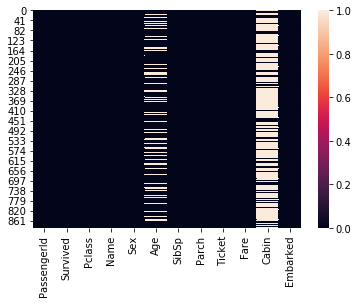

In [51]:
# Let’s take a look which variables have most NaN (missing) values

sns.heatmap(train.isnull())


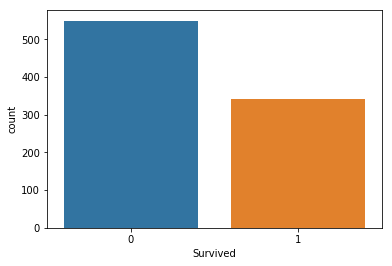

In [52]:
# Let's see how many people survived in general.

sns.countplot(x='Survived',data=train)


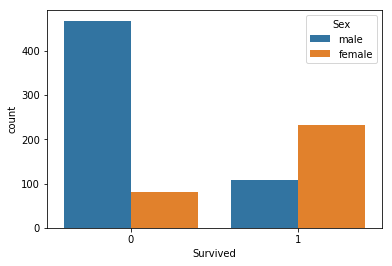

In [53]:
# Let’s see how many people survived by sex.

sns.countplot(x='Survived', hue='Sex', data=train)


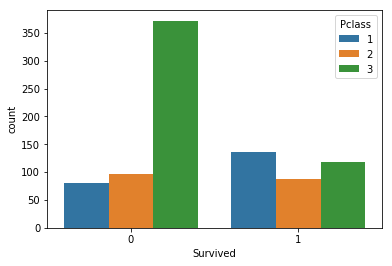

In [54]:
# Let’s see how many people survived by class.

sns.countplot(x='Survived', hue='Pclass', data=train)


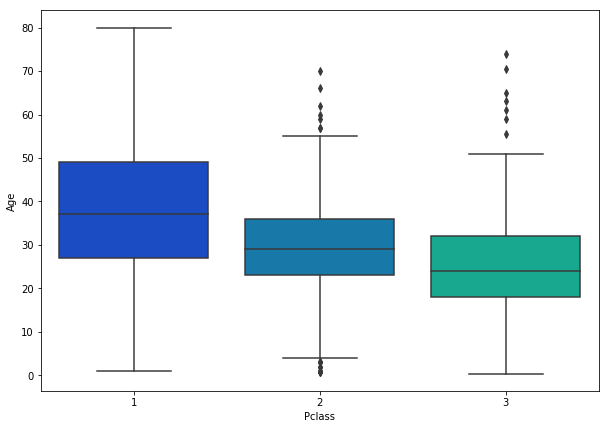

In [55]:
# As we saw before, we have some NaN (missing) values for age. 
# Let’s create a function to impute ages regarding the corresponding age average per class.

plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


In [56]:
# Let’s impute average age values to NaN (missing) age values.

def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
    

In [57]:
# Here, we call the function this way:

train["Age"] = train[["Age", "Pclass"]].apply(add_age, axis=1)


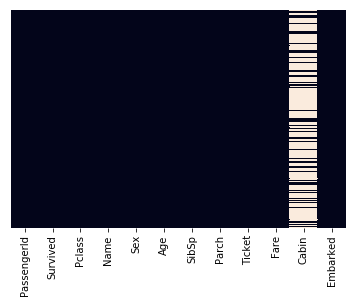

In [58]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [59]:
# We have lots of NaN values for Cabin column, so we just remove it.
train.drop("Cabin", inplace=True, axis=1)   


In [60]:
# Finally, we remove some rows with NaN values.
train.dropna(inplace=True)  


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [62]:
# Ok, we are done with cleaning the data. 
# Now, we convert some categorical data into numeric. 
# Let’s use the get_dummies function of Pandas. 
# For instance, for sex column it will create two columns, one for male, one for female.
# What we can do is to remove the first column because one column indicates the value of the other column.
# For example, if the male is 1, then the female will be 0 and vice versa.

sex = pd.get_dummies(train['Sex'], drop_first=True)

# Let's do the same for Embarked and PClass:

embarked = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train["Pclass"], drop_first=True)


In [63]:
# We add these variables to the dataset

train = pd.concat([train,pclass,sex,embarked],axis=1)


In [64]:
# Then, we remove some columns that we are not going to use for our model.

train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"], axis=1, inplace=True)
train.head(5)


,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [65]:
# Now our dataset is ready for the model.
# X will contain all the features and y will contain the target variable.

X = train.drop("Survived", axis=1)
y = train["Survived"]


In [66]:
# Here we are fitting Logistic regression on the whole (100% of the dataset) after creating necessary dummy variables and removing the redundant variables

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.487680
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Sat, 02 Feb 2019   Pseudo R-squ.:                  0.2669
Time:                        16:42:27   Log-Likelihood:                -433.55
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 1.848e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0042      0.006      0.756      0.450      -0.007       0.015
SibSp         -0.2491      0.

In [67]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Let’s use Logistic Regression to train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

# Let’s see how accurate is our model for predictions
predictions = logmodel.predict(X_test)

# Evaluation of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# We obtained model precision of 81% 



              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



C:\Users\ZBiPL3-user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

# The outcomse below can be explained like this:
# True positive: 149 (We predicted a positive result and it was positive)
# True negative:  68 (We predicted a negative result and it was negative)
# False positive: 14 (We predicted a positive result and it was negative)
# False negative: 36 (We predicted a negative result and it was positive)

# the author says we still can improve our model, but doesn't say how.
# Source: https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/

array([[149,  14],
       [ 36,  68]], dtype=int64)

In [69]:
# using another metric: accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}'.format(accuracy))

# We see that accuracy is equal to precision as both equal 81%.

Accuracy: 0.81


In [70]:
# Here we are fitting Logistic regression on the train part (70% of the dataset in this case as we set above test_size = 0.3)
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.491463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            8
Date:                Sat, 02 Feb 2019   Pseudo R-squ.:                  0.2596
Time:                        16:42:27   Log-Likelihood:                -305.69
converged:                       True   LL-Null:                       -412.87
                                        LLR p-value:                 5.974e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0060      0.007      0.898      0.369      -0.007       0.019
SibSp         -0.1722      0.